<img src="https://www.amd.com/system/files/76826-python-logo-1260x709.jpg" height="300px">

# Урок 4. Функции

## Часть 1. Функции

### 1. Объявление функции

def <название_функции> ( <параметр1>,<параметр2>,...,<параметрN>):

    <Оператор1>
    <Оператор2>
    ....
    <ОператорN>
    return [Выражение]

In [4]:
# Простейшая функция. Ничего не принимает в качестве аргументов и ничего не делает
def do_nothing():
    pass

# вызов функции
do_nothing()

# Передача параметра
def say_hi_to(name): 
    print("Hi dear", name)
    return 0

name1 = "Andrew"
var1 = "String"
say_hi_to(name1)          # Просто вызов функции. Результат игнорируется
var1 = say_hi_to(name1)   # а здесь - вызов с сохранением результата в переменную var1
print(var1 + 1)

# Существует большое количество встроенных функций (bult in) 
# Больше функций на https://docs.python.org/3/library/functions.html )
# Например функция определения длины списка
ls = [1,2,3]
len(ls)

Hi dear Andrew
Hi dear Andrew
1


3

### 2. Локальные переменные

**Внимание!!!** Тут в тетрадках IPython можно запутаться с порядком выполнения кода. Например, переменная k не должна печататься в функции f() ниже, но может, если k была опеределена в другой клетке тетрадки IPython. 

In [5]:
# Функции имеют права на чтение к объявленным до функции переменным 
# и не имеют - к объявленным после вызова функции
def f(): 
    print(s)
    #s = "Inside" #Однако не могут их менять
    #print(s)  #Error
    #print(k)  #Error
    
s = "Outside before f"
f()
k = "Outside after f"

Inside
Inside


In [7]:
# При объявлении в функции переменной с тем же именем создается новая (внутренняя) переменная, 
# не связанная с внешней
def f(): 
    print(k)  # Так можно. Тут переменная К не объявляется
    #print(s) # Тем не менее попытка обращения к переменной которая потом будет создана вызывает ошибку
    s = "Inside" 
    print(s)
    print("===========")
    
k = "Outside"
s = "Outside" 
f()
print(s)

Outside
Inside
Outside


In [15]:
def f():
    global s # Для изменения внешних переменных внутри функции их надо объявить глобальной.
    print(s)
    s = "Inside"
    print(s)
    print("=======================")


s = "Outside"
f()
print(s)

Outside
Inside
Inside


### 3. Передача в функции неизменяемых типов (str, int, tuple, frozenset)

Передача происходит по значению, т.е внешняя переменная не зависит от внутренней (локальной) функции

In [24]:
def func(arg, arg2):
    print(arg)
    print(arg2)
    arg = "Inside"
    arg2 = 4
    print(arg)
    print(arg2)
    print("=========")


var1 = "Outside"
var2 = 10
func(var1, var2)
print(var1) # значение переменной вне функции не изменилось
print(var2)

Outside
10
Inside
4
Outside
10


**Пример**. Хотим распечатать зарплаты по месяцам в порядке возрастания, но исходные данные не хотим менять

In [27]:
salaries = (40000, 30000, 25000, 42000)
numbers  = (0    , 1     , 2   ,  3   )

def f(salaries):
    for (i, salary) in enumerate(sorted(salaries)):
        print("{0} salary is {1}".format(i+1, salary))

f(salaries)

1 salary is 25000
2 salary is 30000
3 salary is 40000
4 salary is 42000


### 4. Передача в функции изменяемых типов (list, dict, set)

Передача параметров изменяемых типов происходит по ссылке, т.е изменения в функции влияют на внешние переменные

In [28]:
def changeme(mylist, mydict):
    mylist.append([1, 2, 3, 4])
    mydict[1] = "ccc"
    print("List inside: ", mylist)
    print("Dict inside: ", mydict)
    print("====================")

l1 = [10, 20, 30]
d1 = {1: "a", 2: "b"}
print("List outside: ", l1)
print("Dict outside: ", d1)
print("==================")
changeme(l1, d1)
print("List outside: ", l1)
print("Dict outside: ", d1)

List outside:  [10, 20, 30]
Dict outside:  {1: 'a', 2: 'b'}
List inside:  [10, 20, 30, [1, 2, 3, 4]]
Dict inside:  {1: 'ccc', 2: 'b'}
List outside:  [10, 20, 30, [1, 2, 3, 4]]
Dict outside:  {1: 'ccc', 2: 'b'}


Пример функции, которая изменит переданный ей список:

In [29]:
salaries = [40000, 30000, 25000, 42000]

def f(salaries):
    salaries.sort()
    for (i, salary) in enumerate(salaries):
        print("{0} salary is {1}".format(i+1, salary))

print("salaries before calling f: {0}".format(salaries))
f(salaries)
print("salaries after calling f: {0}".format(salaries))

salaries before calling f: [40000, 30000, 25000, 42000]
1 salary is 25000
2 salary is 30000
3 salary is 40000
4 salary is 42000
salaries after calling f: [25000, 30000, 40000, 42000]


### 5. Именованные аргументы

In [34]:
def describe_person(first_name, last_name, age):
    print("First name: %s" % first_name.title())
    print("Last name: %s" % last_name.title())
    print("Age: %d\n" % age)

describe_person(age=71, first_name='brian', last_name='kernighan')

First name: Brian
Last name: Kernighan
Age: 71



Можно аргумент age сделать необязательным

In [41]:
def describe_person(first_name, last_name, age=10):
    print("First name: %s" % first_name.title())
    print("Last name: %s" % last_name.title())
    print("Age: %d\n" % age)

describe_person(first_name='brian', last_name='kernighan')

First name: Brian
Last name: Kernighan
Age: 10



### 6. Переменное число аргументов

In [47]:
def cheeseshop(kind, *arguments, **keywords):
    print("-- Do you have any", kind, "?")
    print("-- I'm sorry, we're all out of", kind)
    for arg in arguments:
        print(arg)
    print("-" * 40)
    keys = sorted(keywords.keys())
    for kw in keys:
        print(kw, ":", keywords[kw])

cheeseshop("Limburger", "It's very runny, sir.",
           "It's really very, very runny, sir.",
           shopkeeper="Michael Palin",
           client="John Cleese",
           sketch="Cheese Shop Sketch")

-- Do you have any Limburger ?
-- I'm sorry, we're all out of Limburger
It's very runny, sir.
It's really very, very runny, sir.
----------------------------------------
client : John Cleese
shopkeeper : Michael Palin
sketch : Cheese Shop Sketch


Функция, печатающая переданные ей значения и соответствующие аргументы:

In [51]:
def simple_print(**kwargs):
    """
    prints its args and values
    """
    print(kwargs)
    if 'person' in kwargs:
        print("{0} is {1}".format('person', 
                                  kwargs['person']))
    if 'lastname' in kwargs:
        print("{0} is {1}".format('lastname', 
                                  kwargs['lastname']))
    if set(kwargs.keys()).difference(
               set(['person', 'lastname'])):
        print(simple_print.__doc__)
    
simple_print(person="Alex", lastname="Kollins", a=2)

{'person': 'Alex', 'lastname': 'Kollins', 'a': 2}
person is Alex
lastname is Kollins

    prints its args and values
    


Пример функции со множеством необязательных аргументов:

In [ ]:
help(simple_print)

Help on function simple_print in module __main__:

simple_print(**kwargs)
    prints its args and values



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


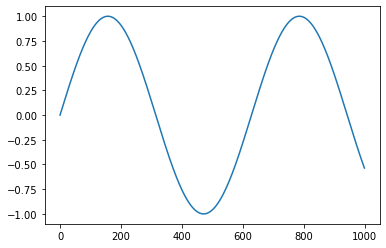

In [52]:
%pylab inline
# from matplotlib import pylab as plt
from math import sin

x = range(1000)
y = [sin(i / 100) for i in x]

plot(x, y)
# plot(x, y, color="green")
# help(plot)

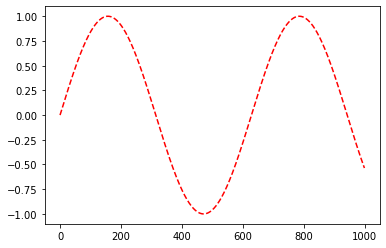

In [53]:
plot(x, y, color="red", linestyle='dashed')
#help(plot)

### 7. Возврат данных из функции с помощью Return

Функция может возвращать что угодно, в том числе и другую функцию

In [58]:
def min(a, b):
    if a < b: return a
    else: return b

print(min(1, 2))

1


In [59]:
def f1():
    print("f1")
    def f2():
        print("Hello!")
    return f2

print(f1)
print(f1())
print(f1()())

<function f1 at 0x7f1dd3da0560>
f1
<function f1.<locals>.f2 at 0x7f1dd3da0ef0>
f1
Hello!
None


### 8. Лямбда функции

In [61]:
def sqr(x):
    return x**2

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(list(map(lambda x: x**2, lst)))

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [62]:
def make_incrementor(n):
    return lambda x: x + n

f = make_incrementor(42)
print(f)

print(f(2))

<function make_incrementor.<locals>.<lambda> at 0x7f1dd3ce2f80>
44


Пример применения одной функции ко всем элементам списка

In [63]:
salaries = [40000, 30000, 25000, 42000]
salaries_indexed = map(lambda sal: sal * 1.13, salaries)
print(salaries_indexed)
[round(sal) for sal in salaries_indexed]

[45200, 33900, 28250, 47460]

Пример фильтрации списка

In [66]:
salaries = [40000, 30000, 25000, 42000]
filtered_salaries = filter(lambda sal: sal > 30000, 
                           salaries)
print(filtered_salaries)
[sal for sal in filtered_salaries]

[40000, 42000]

## Часть 2. Импорт функций из других модулей

In [7]:
import math

print(math.pi)
print(math.pow(2, 4))
print(dir())

3.141592653589793
16.0
['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'math', 'quit']


In [11]:
import matplotlib.pyplot as plt  # Так можно только для модулей или пакетов
from math import pi, pow         # Так можно для всего

print(pi)
print(pow(2, 4))
print(plt)
print(dir())

3.141592653589793
16.0
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>
['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'path', 'pi', 'plt', 'pow', 'pyplot', 'quit']


In [12]:
from math import *

print(pi)
print(dir())

3.141592653589793
['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'copysign', 'cos', 'cosh', 'degrees', 'e', 'erf', 'erfc', 'exit', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'get_ipython', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'path', 'pi', 'plt', 'pow', 'pyplot', 'quit', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']


In [13]:
import math as m

print(m.pi)
print(dir())

3.141592653589793
['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'copysign', 'cos', 'cosh', 'degrees', 'e', 'erf', 'erfc', 'exit', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'get_ipython', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'm', 'modf', 'nan', 'path', 'pi', 'plt', 'pow', 'pyplot', 'quit', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']


## Часть 3. Рекурсивные функции

Рекурсивная функция - это функция, которая в теле вызывает сама себя.

**Пример.** Вычисление факториала (итеративная версия)

In [ ]:
def factorial_iter(n):
    k = 1
    for i in range(2, n + 1):
        k *= i
    return k

In [ ]:
for i, k in enumerate(range(1, 10)):
    print(i+1, factorial_iter(k))

Временная сложность - линейная по n. 

In [ ]:
%timeit factorial_iter(3200)

**Пример.** Вычисление факториала (рекурсивная версия)

In [ ]:
def factorial_recur(n):
    if n == 1:
        return 1
    else:
        return n * factorial_recur(n-1)

# n! = n * (n-1)!
# 4! = 4 * 3 * 2 * 1 = 24
for i, k in enumerate(range(1, 10)):
    print(i+1, factorial_recur(k))

Временная сложность - линейная по n. 

In [ ]:
from sys import setrecursionlimit
setrecursionlimit(1000000)
%timeit factorial_recur(3200)

100 loops, best of 3: 4.98 ms per loop


**Пример.** Вычисление элементов последовательности Фибоначчи (итеративная версия) 

In [ ]:
def fib_iter(n):
    a, b = 1, 1
    for i in range(n):
        a, b = b, a + b
    return a

In [ ]:
for i in range(11):
    print(fib_iter(i), end=", ")

1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 

Временная сложность - линейная по n. 

In [ ]:
%timeit fib_iter(20)

**Пример.** Вычисление элементов последовательности Фибоначчи (рекурсивная версия) 

In [ ]:
def fib_recur(n):
    if n <= 1:
        return 1
    else:
        return fib_recur(n - 1) + fib_recur(n - 2)

In [ ]:
for i in range(11):
    print(fib_recur(i), end=", ")

Временная сложность - экспоненциальная по n. 

**Доказательство** (метод математической индукции)

Уравнение рекурии $T(n) = T(n-1) + T(n-2) + O(1)$. <a href="https://ru.wikipedia.org/wiki/%C2%ABO%C2%BB_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%B8_%C2%ABo%C2%BB_%D0%BC%D0%B0%D0%BB%D0%BE%D0%B5">Обозначение O</a> - пояснение на Википедии

$T(n \leq 1) = O(1)$

Пусть $T(n - 1) = O(2^{n-1})$

Тогда $T(n) = T(n-1) + T(n-2) + O(1) = O(\frac{2^{n}}{2}) + O(2^{n-2}) + O(1) = O(2^n)$

In [ ]:
%timeit fib_recur(40)

**Пример**. Метод сортировки QuickSort

In [ ]:
def qs(a_list):
    if len(a_list) <= 1:
        return a_list
    else:
        el0 = a_list[0]
        left, right = [], []
        for elem in a_list[1:]:
            if elem < el0:
                left.append(elem)
            else:
                right.append(elem)
        return qs(left) + [el0] + qs(right)
        

In [ ]:
qs([9, 8, 7, 6, 5, 4])

In [ ]:
from random import choice

def quick_sort(a_list):
    if len(a_list) <= 1:
        return a_list
    pivot = choice(range(len(a_list)))
    return quick_sort([i for i in a_list[:pivot] + a_list[pivot+1:] 
                       if i < a_list[pivot]]) + [a_list[pivot]] + \
           quick_sort([i for i in a_list[:pivot] + a_list[pivot+1:] 
                       if i >= a_list[pivot]])

In [ ]:
quick_sort([3, 4, 2, 1, 6])

Временная сложность - $O(n*log(n))$

In [ ]:
%timeit quick_sort([3, 4, 2, 1, 6, 145, 56, 23, 45, 234, 21])

Примеры дерева рекурсии QuickSort
<img src="../img/qsort-recur1.png">

Опорный элемент - всегда нулевой
<img src="../img/qsort-recur2.png">

T(n) = 2*T(n/2) + O(n)

При случайном выборе опорного элемента
<img src="../img/qsort_tree.gif">

Реализация, мимимизирующая потребление дополнительной памяти 

In [ ]:
import random

def sub_partition(array, start, end, idx_pivot):

    'returns the position where the pivot winds up'

    if not (start <= idx_pivot <= end):
        raise ValueError('idx pivot must be between start and end')

    array[start], array[idx_pivot] = array[idx_pivot], array[start]
    pivot = array[start]
    i = start + 1
    j = start + 1

    while j <= end:
        if array[j] <= pivot:
            array[j], array[i] = array[i], array[j]
            i += 1
        j += 1

    array[start], array[i - 1] = array[i - 1], array[start]
    return i - 1

def quicksort_inplace(array, start=0, end=None):

    if end is None:
        end = len(array) - 1

    if end - start < 1:
        return

    idx_pivot = random.randint(start, end)
    i = sub_partition(array, start, end, idx_pivot)
    #print array, i, idx_pivot
    quicksort_inplace(array, start, i - 1)
    quicksort_inplace(array, i + 1, end)

In [ ]:
a_list = [3, 4, 2, 1, 6, 7]
quicksort_inplace(a_list)
a_list

**Пример**. Простая визуализация бинарного дерева

In [ ]:
class BinaryTree:
    def __init__(self, rootObj):
        self.root = rootObj
        self.leftChild = None
        self.rightChild = None

    def insertLeft(self, newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t

    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t

    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def setRootVal(self,obj):
        self.root = obj

    def getRootVal(self):
        return self.root
           
    def __str__(self):
        output = str(self.root)
        if self.leftChild:
            output = '/'.join([self.leftChild.__str__(), output]) 
        else:
            output = '[' + output
        if self.rightChild:
            output = '\\'.join([output, self.rightChild.__str__()])     
        else:
            output = output + ']'
        return output

In [ ]:
r = BinaryTree('a')
r.insertLeft('b')
r.insertRight('c')
print("Root:", r.getRootVal())
print("Left child:", r.getLeftChild())
print("Tree:", r)
r.getLeftChild().insertLeft('d')
r.getLeftChild().insertRight('e')
print("Tree:", r)
r.getRightChild().insertLeft('f')
r.getRightChild().insertRight('g')
print("Tree:", r)

#      a
#    /   \
#   b     c
#  / \   / \
# d   e f   g

## Часть 4. Декораторы

### Без параметров

In [ ]:
from functools import wraps

def logit(func):
    @wraps(func)
    def with_logging(*args, **kwargs):
        print(func.__name__ + " была исполнена")
        return func(*args, **kwargs)
    return with_logging

@logit
def addition_func(x):
    """Считаем что-нибудь"""
    return x + x


result = addition_func(4)
# Вывод: addition_func была исполнена

addition_func была исполнена


### С параметрами

In [ ]:
def my_decorator(input_arg):
 
    def the_real_decorator(function):
        def wrapper(*args, **kwargs):
            result = function(*args, **kwargs)
            return f'<{input_arg}>{result}<\\{input_arg}>'
        return wrapper
 
    return the_real_decorator

In [ ]:
# @my_decorator('b')
def hello():
    return 'hello'

b = my_decorator('b')
i = my_decorator('i')
span = my_decorator('span')

@span
@b
@i
def hello():
    return 'hello'

In [ ]:
print(hello())

<span><b><i>hello<\i><\b><\span>


## Часть 5. Генераторы

### Функции генераторы

In [ ]:
def counter():
    i = 1
    while(i <= 10):
        yield i
        i += 1
        return

In [ ]:
gen1 = counter()

for i in gen1:
  print(i)

1
2
3
4
5
6
7
8
9
10


In [ ]:
languages = ['Java', 'Python', 'JavaScript']
versions = [14, 3]

result = zip(languages, versions)

print(next(result))
print(next(result))

('Java', 14)
('Python', 3)


In [ ]:
def counter():
    i = 1
    while(True):
        yield i
        i += 1
        if i >= 10:
            raise StopIteration # до 3.7
            # return

def counter_wrapper():
  try:
    yield from counter()
  except StopIteration:
    return

In [ ]:
count = counter_wrapper()
print(next(count))
print(next(count))
print(next(count))
print(next(count))
print(next(count))
print(next(count))
print(next(count))
print(next(count))
print(next(count))
print(next(count))
# print(list(counter_wrapper()))

1
2
3
4
5
6
7
8
9


RuntimeError: ignored

### Генераторы списков

In [ ]:
l1 = (x**2 for x in range(10))
print(list(l1)) # [x**2 for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


### Генераторы словарей

In [ ]:
d1 = {x: x**2 for x in range(10)}
print(d1)

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


## Часть 6. Итераторы

In [ ]:
class SimpleIterator:
    def __init__(self, limit):
        self.limit = limit
        self.counter = 0

    def __iter__(self):
        return self        
        
    def __next__(self):
        if self.counter < self.limit:
            self.counter += 1
            return self.counter
        else:
            raise StopIteration

s_iter2 = SimpleIterator(10)

for i in s_iter2:
    print(i)

1
2
3
4
5
6
7
8
9
10
